In [1]:
#primeira abordagem
import numpy as np
import cv2 
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('motherboards/placa.jpg')
img = cv.medianBlur(img,5)
for y in range(0, img.shape[0], 1): #percorre as linhas
    for x in range(0, img.shape[1], 1): #percorre as colunas imagem[y, x] = (0,(x*y)%256,0)
        (b, g ,r) = img[y,x]
        media = (np.float16(b) + np.float16(g) +np.float16(r))/3
        erro = abs(media - b)+abs(media - g)+abs(media - r)
        if erro < 36 and media > 120:
            img[y,x]= (255,255,255)
        else:
            img[y,x]=(0,0,0)

plt.imshow(img)
plt.show()
cv2.imwrite("Outputs_tests_filters/saida3.jpg", img)

#nessa abordagem tentamos percorrer cada pixel da imagem fazendo uma limiarização manual, 
#todos os pixes cinzas, quase brancos, ficavam brancos, os demais pretos

<Figure size 640x480 with 1 Axes>

True

In [1]:
#segunda abordagem
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

i = 1 
while i < 15: 
    img = cv.imread("motherboards/placa"+str(i)+".jpg",0)
    img = cv.medianBlur(img,5)

    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,-2)

    printImg = th3
    plt.imshow(printImg)
    plt.show()
    cv2.imwrite("Outputs_tests_filters/saida"+str(i)+".jpg", printImg)
    i = i+1
# Nessa aboradagem usamos uma limiarização local

TypeError: Image data of dtype object cannot be converted to float

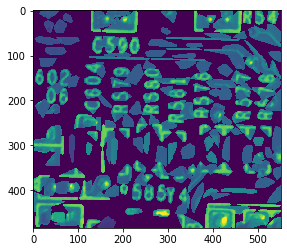

True

In [67]:
#segunda abordagem
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

img = cv.imread('placa2.jpg',0)
img = cv.medianBlur(img,5)

th3 = img

vis = th3.copy()

# detect regions in gray scale image
mser = cv2.MSER_create(-2, 200, 600, 5, 0.2, 200, 1.01, 0.003, 5)
regions, _ = mser.detectRegions(th3)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]

cv2.polylines(vis, hulls, 1, (0, 255, 0))

# teste
mask = np.zeros((th3.shape[0], th3.shape[1], 1), dtype=np.uint8)

for contour in hulls:

    cv2.drawContours(mask, [contour], -1, (255 , 255, 255), -1)

#this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(th3, th3, mask=mask)

printImg = text_only
plt.imshow(printImg)
plt.show()
cv2.imwrite("saida4.jpg", printImg)

#testes de deteccao de areas com textos

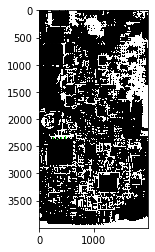

True

In [4]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('saida1.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

printImg = img
plt.imshow(printImg)
plt.show()
cv2.imwrite("saida5.jpg", printImg)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


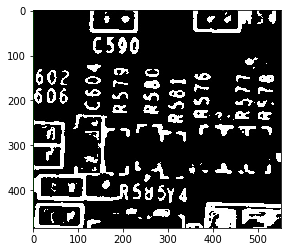

True

ồ
8
-
-
Q
ọ-
-
-

È"ẵ

ĩỗ"


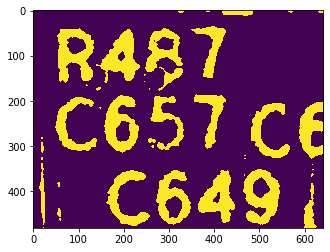